In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [7]:
dataset = pd.read_csv('Advertising.csv',index_col=0)
dataset.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
x,y = dataset[['TV','Radio','Newspaper']], dataset['Sales']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [10]:
mlr = LinearRegression()
mlr.fit(x_train,y_train);

In [12]:
print('Intercept: ', mlr.intercept_)
print('Coefficients: ', list(zip(x,mlr.coef_)))

Intercept:  2.652789668879496
Coefficients:  [('TV', 0.04542559602399794), ('Radio', 0.18975772766893614), ('Newspaper', 0.00460307895311209)]


In [13]:
y_pred = mlr.predict(x_test)
print('Predictions:\n',y_pred)

Predictions:
 [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [17]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = mse**0.5

print('Mean Absolute Error: ',mae)
print('Mean Squared Error: ',mse)
print('Root Mean Squared Error: ',rmse)

Mean Absolute Error:  1.0638483124072031
Mean Squared Error:  1.8506819941636967
Root Mean Squared Error:  1.3603977338130553


<Axes: xlabel='Newspaper', ylabel='Sales'>

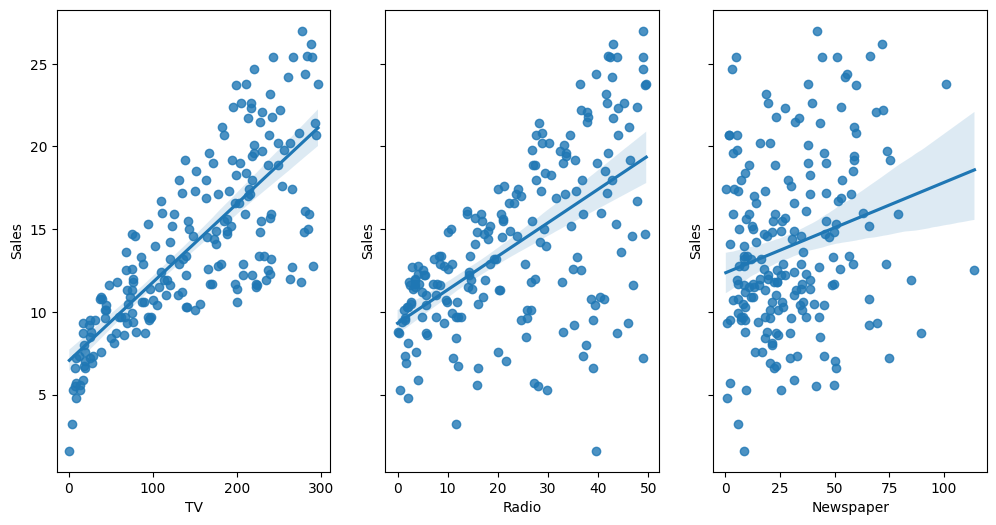

In [18]:
f,axs = plt.subplots(1,3,sharey=True,figsize=(12,6))
sb.regplot(data=dataset,x='TV',y='Sales',ax=axs[0])
sb.regplot(data=dataset,x='Radio',y='Sales',ax=axs[1])
sb.regplot(data=dataset,x='Newspaper',y='Sales',ax=axs[2])